# Analysis of Prostate cancer dataset

In [1]:
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np

import sys
import os

In [2]:
data_path = "../data/"

## Exploring data

The prostate cancer dataset is provided as a tab-separated report file (TSV file). The dataset contains 97 total observations and 10 measurements (9 predictors, 1 response).

**Predictor** columns (columns 1-8):

- lcavol

- lweight

- age

- lbph

- svi

- lcp

- gleason

- pgg45

**Response** columns (column 9):

- lpsa

Other columns:

- train/test indicator (column 10)

This last column indicates which 67 observations were used as the 
"training set" and which 30 as the test set, as described on page 48
in "Hastie T, Tibshirani R, Friedman J. *The Elements of Statistical Learning: Data Mining, Inference, and Prediction (second edition)*. Springer. 2009".

In [3]:
procan = pd.read_csv(os.path.join(data_path, "Prostate_cancer.tsv"), sep="\t", index_col=0).reset_index(drop=True)
procan.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [4]:
procan.tail()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T
96,3.471966,3.974998,68,0.438255,1,2.904165,7,20,5.582932,F


In [5]:
procan.shape

(97, 10)

## Prepare data for linear regression

To begin, we remove the ```train``` column from our dataset and we store it in a new ```pandas.Series``` variable, called ```train```. 

In [6]:
train = procan["train"]
train.head()

0    T
1    T
2    T
3    T
4    T
Name: train, dtype: object

In [7]:
# drop train column
procan.drop(["train"], inplace=True, axis=1)
procan.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


Now we can separate predictors (columns 1-8) from the response columns (lpsa) and store the corresponding values in two different variables.

In [8]:
# retrieve response
lpsa = procan["lpsa"]
lpsa.head()

0   -0.430783
1   -0.162519
2   -0.162519
3   -0.162519
4    0.371564
Name: lpsa, dtype: float64

In [9]:
# drop lpsa and store data in predictors
predictors = procan.drop(["lpsa"], axis=1)
predictors.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0


We now check if there are NA values in predictors' data.

In [10]:
predictors.isnull().any()

lcavol     False
lweight    False
age        False
lbph       False
svi        False
lcp        False
gleason    False
pgg45      False
dtype: bool

OK, no NA values in our data, anything to worry about.

Let's now explore which are the predictores dtypes.

In [11]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 8 columns):
lcavol     97 non-null float64
lweight    97 non-null float64
age        97 non-null int64
lbph       97 non-null float64
svi        97 non-null int64
lcp        97 non-null float64
gleason    97 non-null int64
pgg45      97 non-null int64
dtypes: float64(4), int64(4)
memory usage: 6.1 KB


The dtypes are two: ```float64``` and ```int64```.

We can now plot histogram for each predictor.

(array([ 0., 10., 20., 30., 40., 50.]), <a list of 6 Text yticklabel objects>)

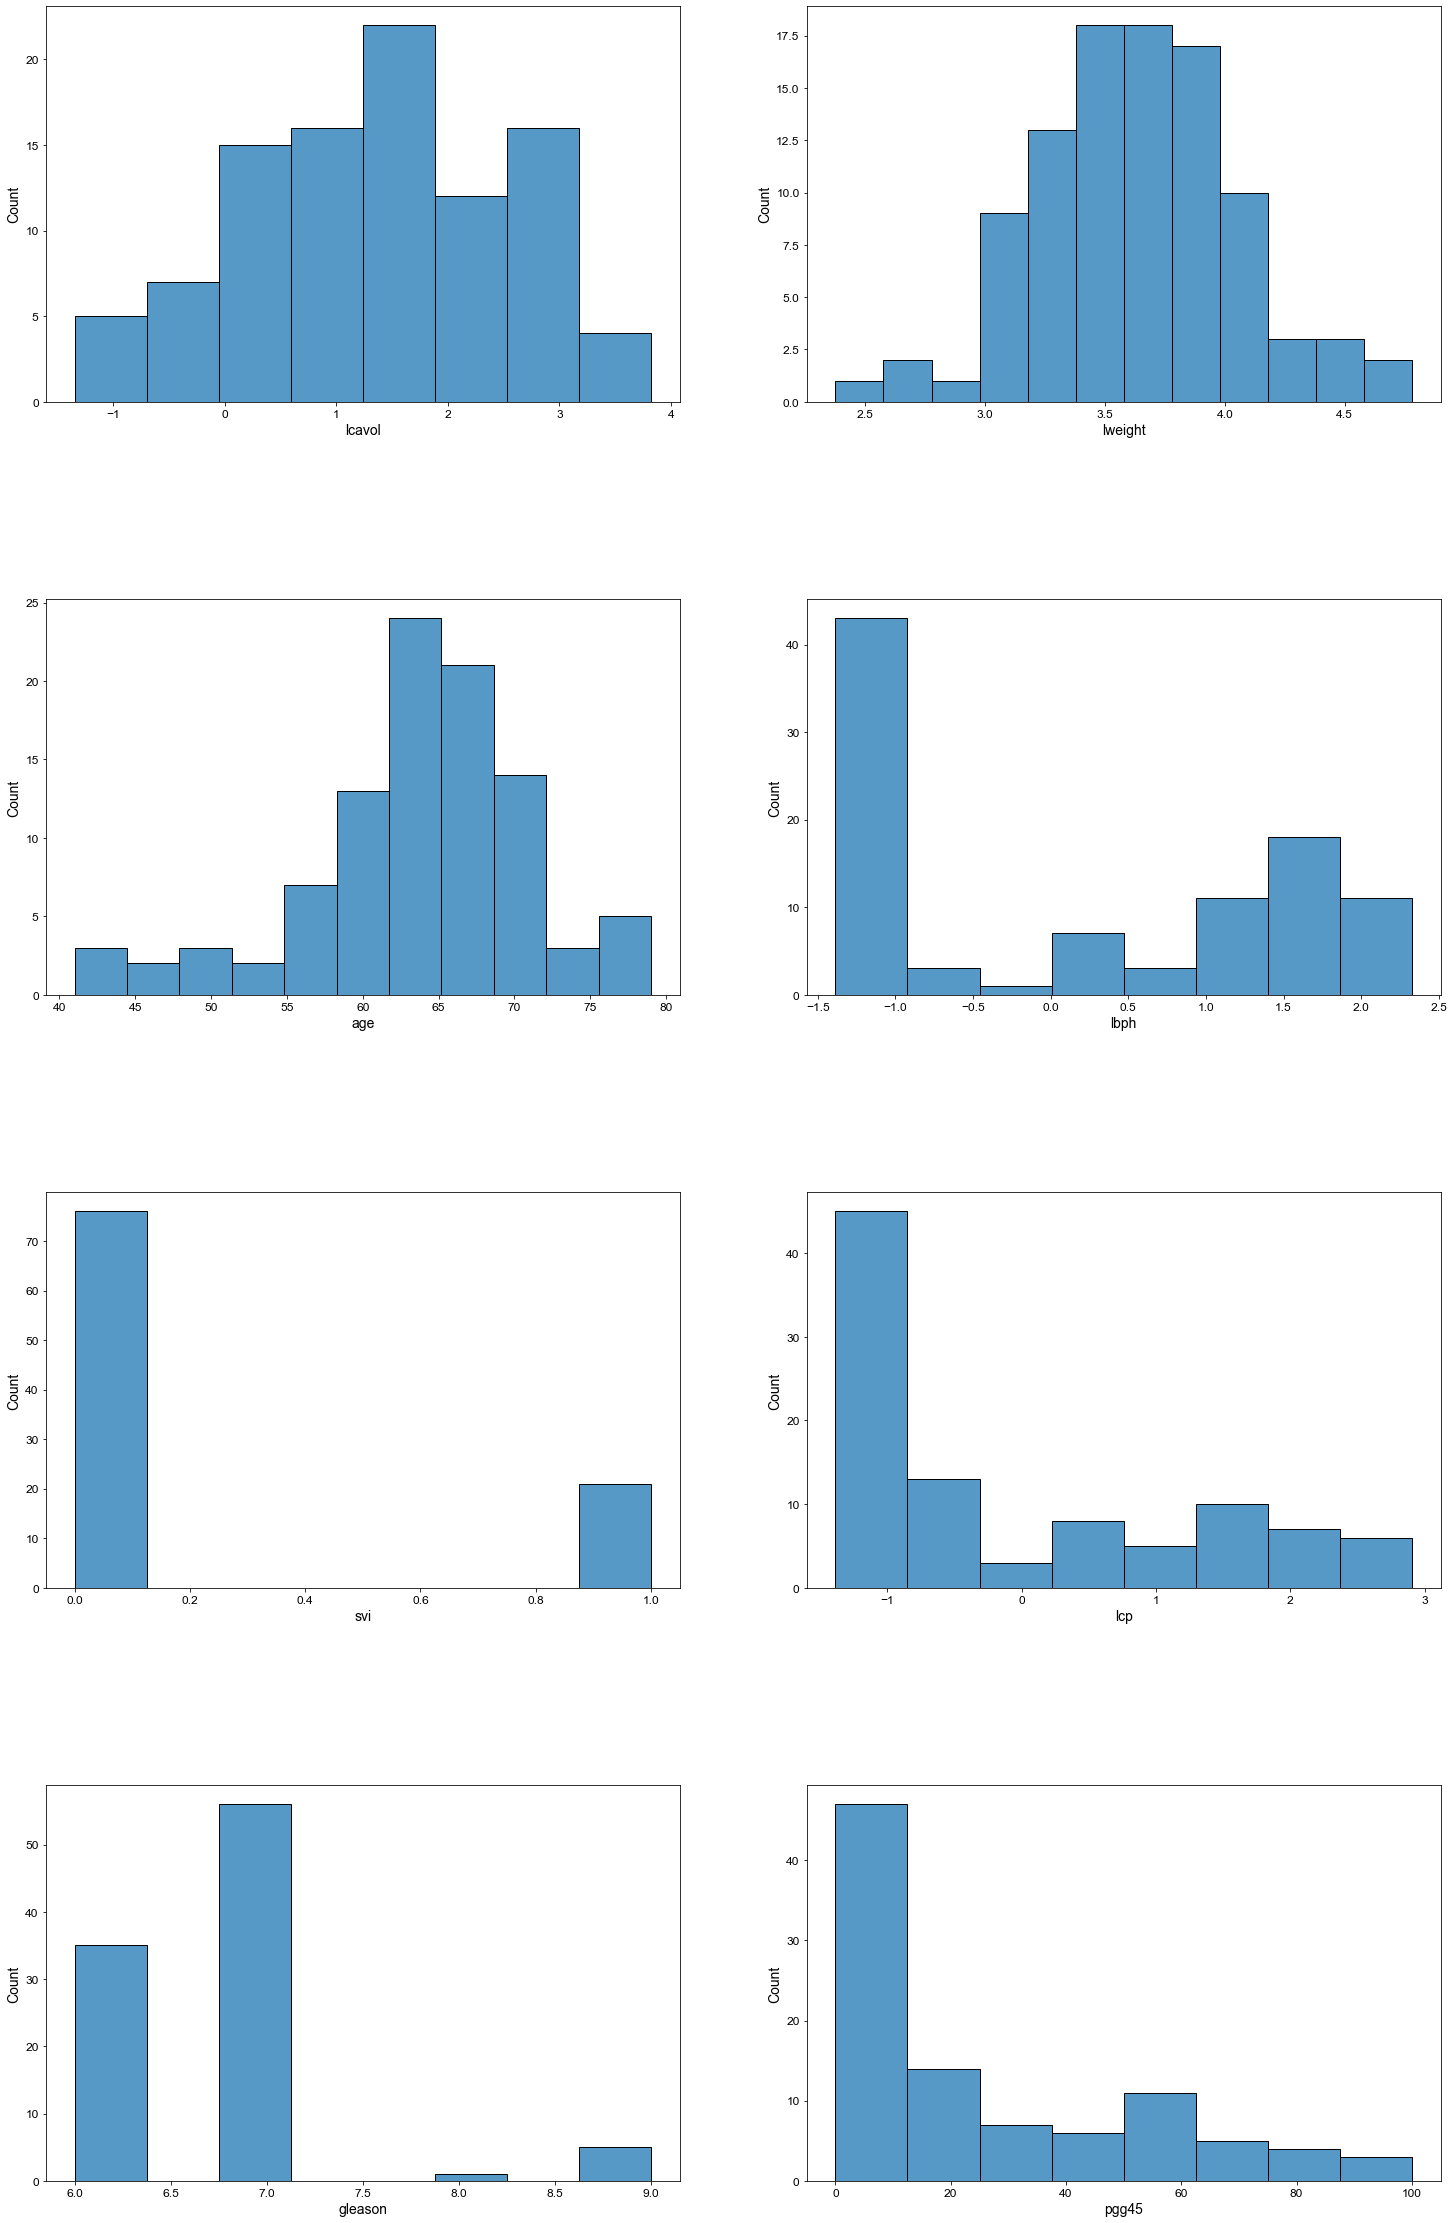

In [12]:
# histograms
afont = {"fontname":"Arial"}
fig = plt.figure(figsize=(25,40))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
fig.add_subplot(421)
sns.histplot(data=predictors, x="lcavol")
plt.xlabel("lcavol", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(422)
sns.histplot(data=predictors, x="lweight")
plt.xlabel("lweight", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(423)
sns.histplot(data=predictors, x="age")
plt.xlabel("age", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(424)
sns.histplot(data=predictors, x="lbph")
plt.xlabel("lbph", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(425)
sns.histplot(data=predictors, x="svi")
plt.xlabel("svi", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(426)
sns.histplot(data=predictors, x="lcp")
plt.xlabel("lcp", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(427)
sns.histplot(data=predictors, x="gleason")
plt.xlabel("gleason", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(428)
sns.histplot(data=predictors, x="pgg45")
plt.xlabel("pgg45", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)

Let's compute some basic statistics on our predictors.

In [13]:
predictors.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000


We split the dataset in training and testing data, using the values ```train``` column. If ```train``` has ```T``` assign that row to training set, asssign to testing set otherwise.

In [14]:
data_train = predictors[train == "T"].reset_index(drop=True)
data_train.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0


In [15]:
data_train.shape

(67, 8)

In [16]:
data_test = predictors[train == "F"].reset_index(drop=True)
data_test.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,0.737164,3.473518,64,0.615186,0,-1.386294,6,0
1,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0
2,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0
3,1.205971,3.442019,57,-1.386294,0,-0.430783,7,5
4,2.059239,3.501043,60,1.474763,0,1.348073,7,20


In [17]:
data_test.shape

(30, 8)

We have now 67 observations assigned to our training set and 30 obseravtions assigned to the testing set.

Let's now do the same operation on the response (```lpsa``` column).

In [18]:
lpsa_train = lpsa[train == "T"].reset_index(drop=True)
lpsa_train.head()

0   -0.430783
1   -0.162519
2   -0.162519
3   -0.162519
4    0.371564
Name: lpsa, dtype: float64

In [19]:
lpsa_train.shape

(67,)

In [20]:
lpsa_test = lpsa[train == "F"].reset_index(drop=True)
lpsa_test.head()

0    0.765468
1    1.047319
2    1.047319
3    1.398717
4    1.658228
Name: lpsa, dtype: float64

In [21]:
lpsa_test.shape

(30,)

As for the predictors, in response training set we have 67 observations, while in the response test set we have 30 observations.

Let's now compute the correlation coefficeints for the predictors.

In [22]:
corr_mat = data_train.corr(method="pearson")
corr_mat

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.300232,0.286324,0.063168,0.592949,0.692043,0.426414,0.483161
lweight,0.300232,1.000000,0.316723,0.437042,0.181054,0.156829,0.023558,0.074166
age,0.286324,0.316723,1.000000,0.287346,0.128902,0.172951,0.365915,0.275806
lbph,0.063168,0.437042,0.287346,1.000000,-0.139147,-0.088535,0.032992,-0.030404
svi,0.592949,0.181054,0.128902,-0.139147,1.000000,0.671240,0.306875,0.481358
lcp,0.692043,0.156829,0.172951,-0.088535,0.671240,1.000000,0.476437,0.662533
gleason,0.426414,0.023558,0.365915,0.032992,0.306875,0.476437,1.000000,0.757056
pgg45,0.483161,0.074166,0.275806,-0.030404,0.481358,0.662533,0.757056,1.000000


The correlation matrix it is very close to the **Table 3.1** in the book "Hastie T, Tibshirani R, Friedman J. *The Elements of Statistical Learning: Data Mining, Inference, and Prediction (second edition)*. Springer. 2009".

Let's now perform data standardization, using formula:

$v(i,j) = \frac{v(i,j) - \mu_{j}}{\sigma^{2}_{j}}$ 

In [23]:
def standardize(value, mean, std):
    return ((value - mean) / std)

p_means = data_train.mean()
p_std = data_train.std()
data_train_std = pd.DataFrame(columns=data_train.columns, index=data_train.index, data=None)
for p in list(data_train.columns):
    assert p in list(data_train_std.columns)
    data_train_std[p] = data_train.apply(lambda x : standardize(x[p], p_means[p], p_std[p]), axis=1)
data_train_std.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-1.523680,-1.797414,-1.965590,-0.995955,-0.533063,-0.836769,-1.031712,-0.896487
1,-1.857204,-0.643057,-0.899238,-0.995955,-0.533063,-0.836769,-1.031712,-0.896487
2,-1.468157,-1.961526,1.233468,-0.995955,-0.533063,-0.836769,0.378996,-0.213934
3,-2.025981,-0.720349,-0.899238,-0.995955,-0.533063,-0.836769,-1.031712,-0.896487
4,-0.452342,-0.406493,-0.366061,-0.995955,-0.533063,-0.836769,-1.031712,-0.896487


A more efficient and correct scaling procedure would have called ```StandardScaler``` from ```sklearn```.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_train)
scaler.transform(data_train)[:10,:]

array([[-1.53517959, -1.81097918, -1.98042525, -1.00347165, -0.53708616,
        -0.84308399, -1.03949894, -0.90325324],
       [-1.87122084, -0.64791082, -0.90602451, -1.00347165, -0.53708616,
        -0.84308399, -1.03949894, -0.90325324],
       [-1.47923712, -1.97632998,  1.24277698, -1.00347165, -0.53708616,
        -0.84308399,  0.38185676, -0.21554907],
       [-2.04127153, -0.72578526, -0.90602451, -1.00347165, -0.53708616,
        -0.84308399, -1.03949894, -0.90325324],
       [-0.45575567, -0.40956052, -0.36882414, -1.00347165, -0.53708616,
        -0.84308399, -1.03949894, -0.90325324],
       [-1.91627934, -0.83986455, -1.98042525, -1.00347165, -0.53708616,
        -0.84308399, -1.03949894, -0.90325324],
       [-0.50300267, -0.18307203, -0.90602451,  1.00876737, -0.53708616,
        -0.84308399, -1.03949894, -0.90325324],
       [-0.85856191, -0.04644453,  0.03407614, -1.00347165, -0.53708616,
        -0.84308399, -1.03949894, -0.90325324],
       [-2.15730403, -0.05798078

Anyway, we can proceed with our standardized data. Let's now plot the new histograms of the standardized predictors.

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text yticklabel objects>)

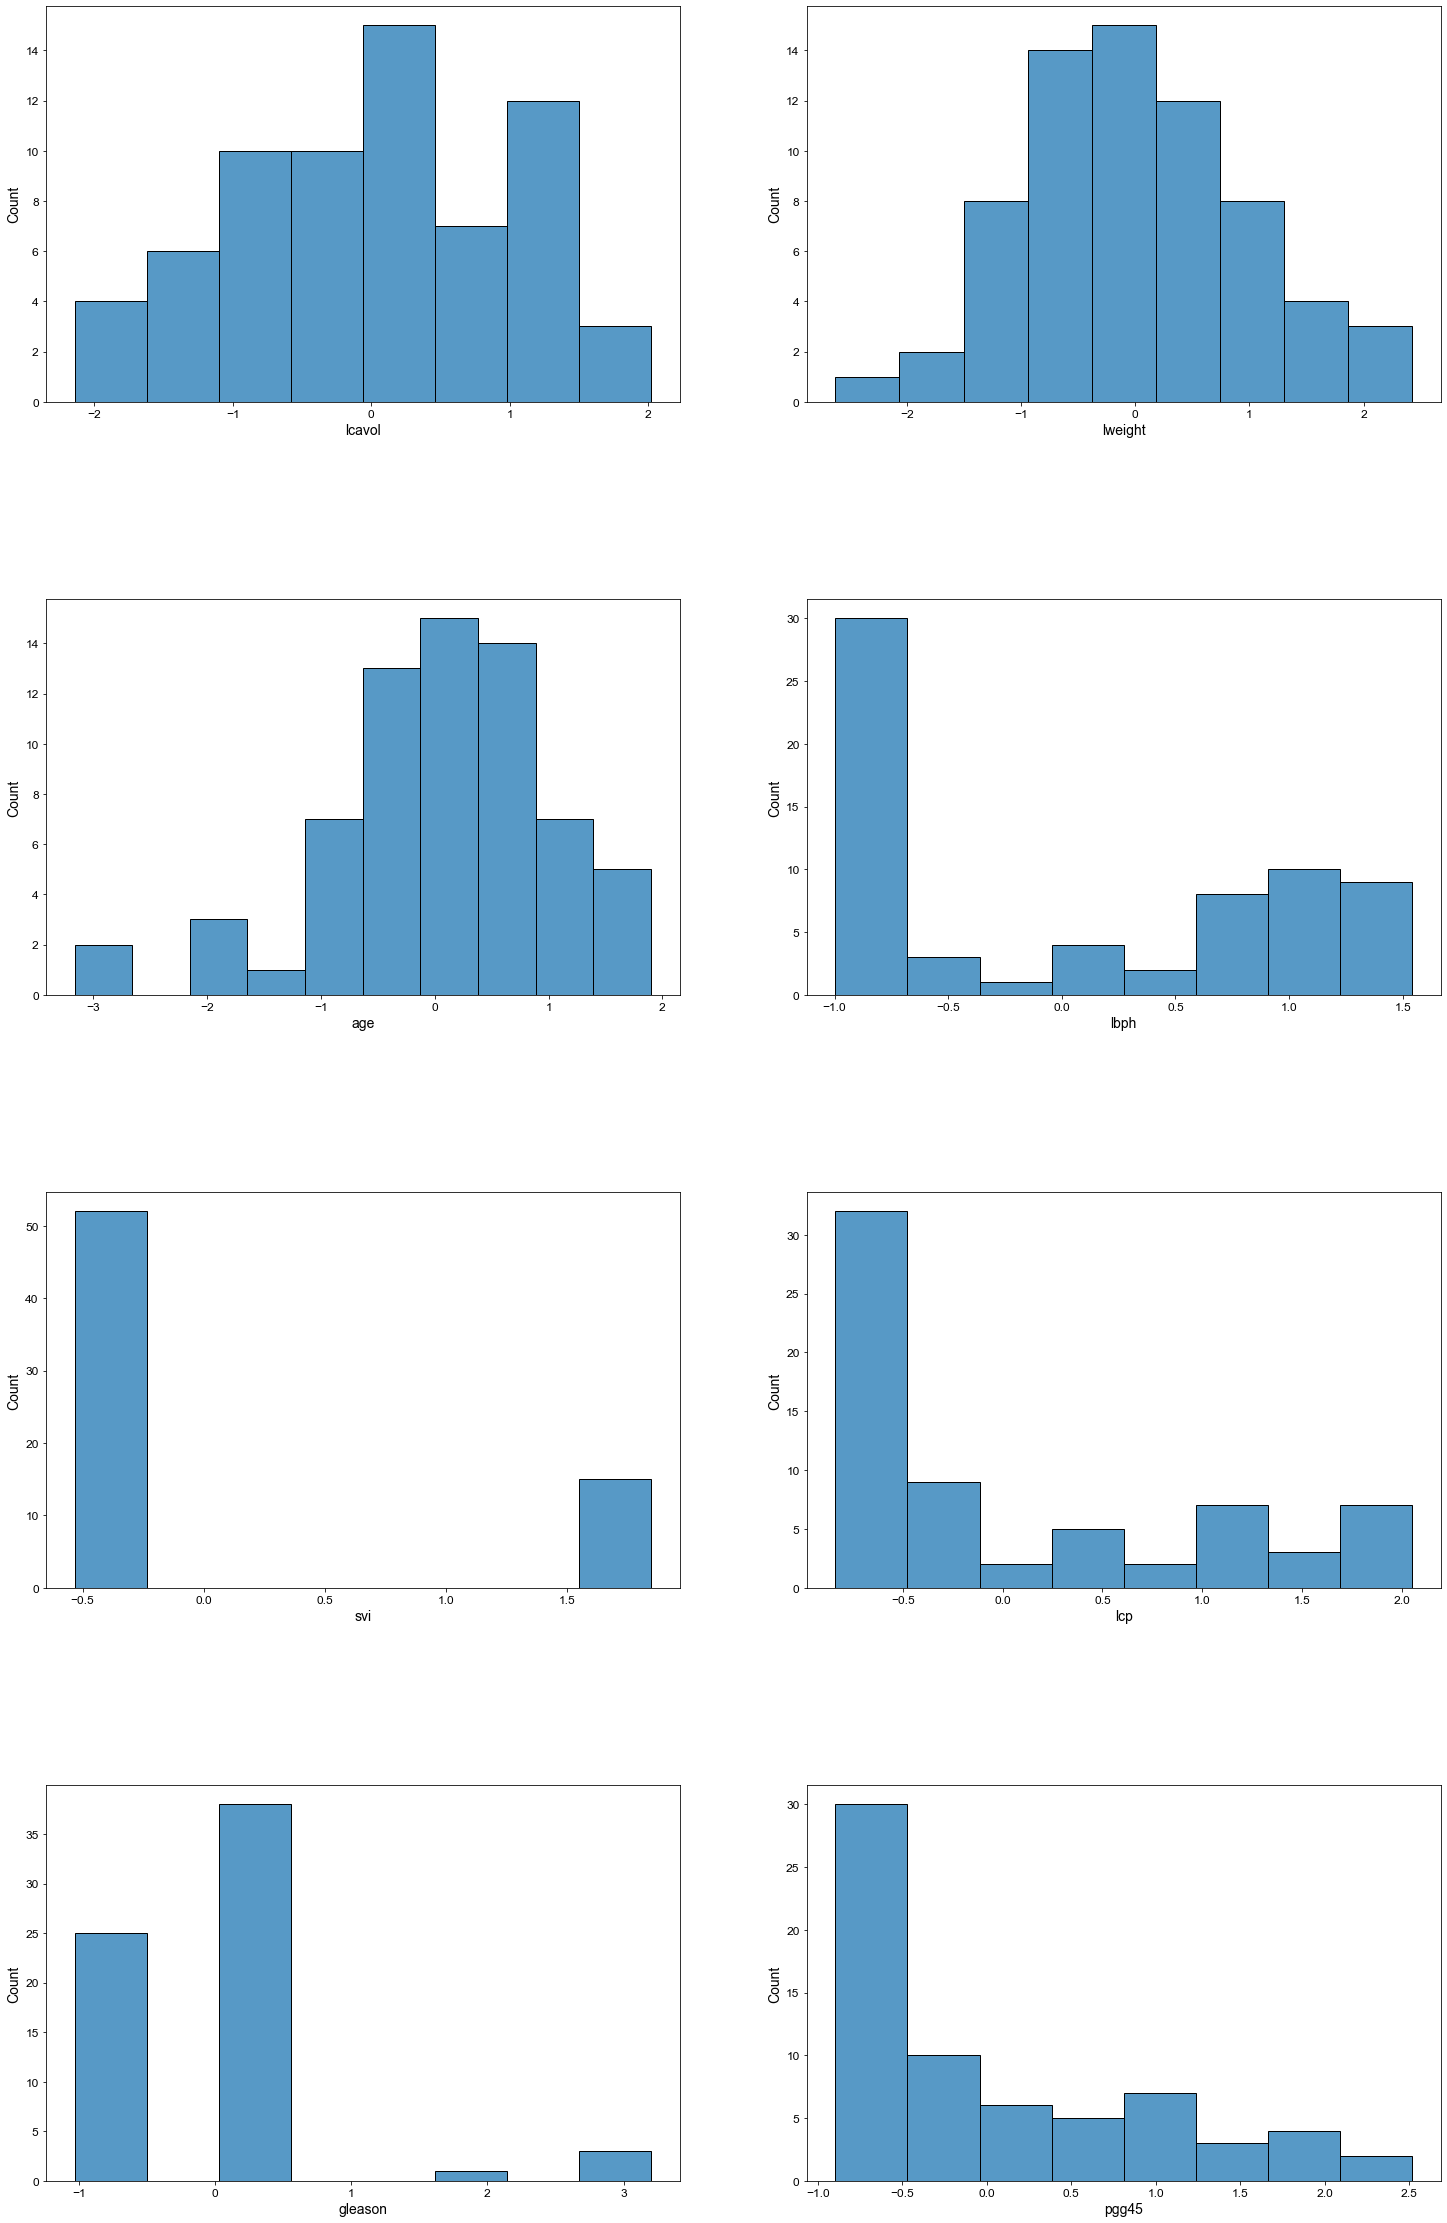

In [25]:
fig = plt.figure(figsize=(25,40))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
fig.add_subplot(421)
sns.histplot(data=data_train_std, x="lcavol")
plt.xlabel("lcavol", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(422)
sns.histplot(data=data_train_std, x="lweight")
plt.xlabel("lweight", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(423)
sns.histplot(data=data_train_std, x="age")
plt.xlabel("age", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(424)
sns.histplot(data=data_train_std, x="lbph")
plt.xlabel("lbph", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(425)
sns.histplot(data=data_train_std, x="svi")
plt.xlabel("svi", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(426)
sns.histplot(data=data_train_std, x="lcp")
plt.xlabel("lcp", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(427)
sns.histplot(data=data_train_std, x="gleason")
plt.xlabel("gleason", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(428)
sns.histplot(data=data_train_std, x="pgg45")
plt.xlabel("pgg45", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)

## Fitting linear regression model

Let's now fit a linear regression model on standardized training data, using as dependent variables the predictors (columns 1-8) and independent variable the response (```lpsa```).

In [26]:
# compute intercept, data already standardized
reg = LinearRegression().fit(data_train_std, lpsa_train)  
reg.coef_

array([ 0.71640701,  0.2926424 , -0.14254963,  0.2120076 ,  0.30961953,
       -0.28900562, -0.02091352,  0.27734595])

We can print the linear regression model coefficents.

In [27]:
coeffs = [reg.intercept_] + list(reg.coef_)
pd.DataFrame(index=["intercept"] + list(data_train.columns), data=coeffs, columns=["Model Coefficents"])

,Model Coefficents
intercept,2.452345
lcavol,0.716407
lweight,0.292642
age,-0.142550
lbph,0.212008
svi,0.309620
lcp,-0.289006
gleason,-0.020914
pgg45,0.277346


And let's compute the coefficient of determination of the model ($R^{2}$).

In [28]:
reg.score(data_train_std, lpsa_train)

0.6943711796768237

Let's now assess the predicted model. To do this we will use ```statsmodels``` modules.

In [29]:
N, p = data_train_std.shape
data_train_std_int = np.zeros(shape=(N, p+1), dtype=np.float)
data_train_std_int[:,0] = 1  # intercept
data_train_std_int[:, 1:(p+1)] = data_train_std.values  # values
X = pd.DataFrame(columns=["intercept"] + list(data_train_std.columns), data=data_train_std_int)
model = sm.OLS(lpsa_train, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     16.47
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           2.04e-12
Time:                        09:22:56   Log-Likelihood:                -67.505
No. Observations:                  67   AIC:                             153.0
Df Residuals:                      58   BIC:                             172.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4523      0.087     28.182      0.000       2.278       2.627
lcavol         0.7164      0.134      5.366      0.000       0.449       0.984
lweight        0.2926      0.106      2.751      0.008       0.080       0.506
age           -0.1425      0.102     -1.396      0.168      -0.347       0.062
lbph           0.2120      0.103      2.056      0.044       0.006       0.418
svi            0.3096      0.125      2.469      0.017       0.059       0.561
lcp           -0.2890      0.155     -1.867      0.067      -0.599       0.021
gleason       -0.0209      0.143     -0.147      0.884      -0.306       0.264
pgg45          0.2773      0.160      1.738      0.088      -0.042       0.597
==============================================================================
Omnibus:                        0.825   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.389
Skew:                          -0.164   Prob(JB):                        0.823
Kurtosis:                       3.178   Cond. No.                         4.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""